In [151]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [152]:
data = pd.read_csv('D:\My World\Machine Learning\Supervised learning\Regression\Linear Regression/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [154]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Data preprocessing

In [155]:
#Count null values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

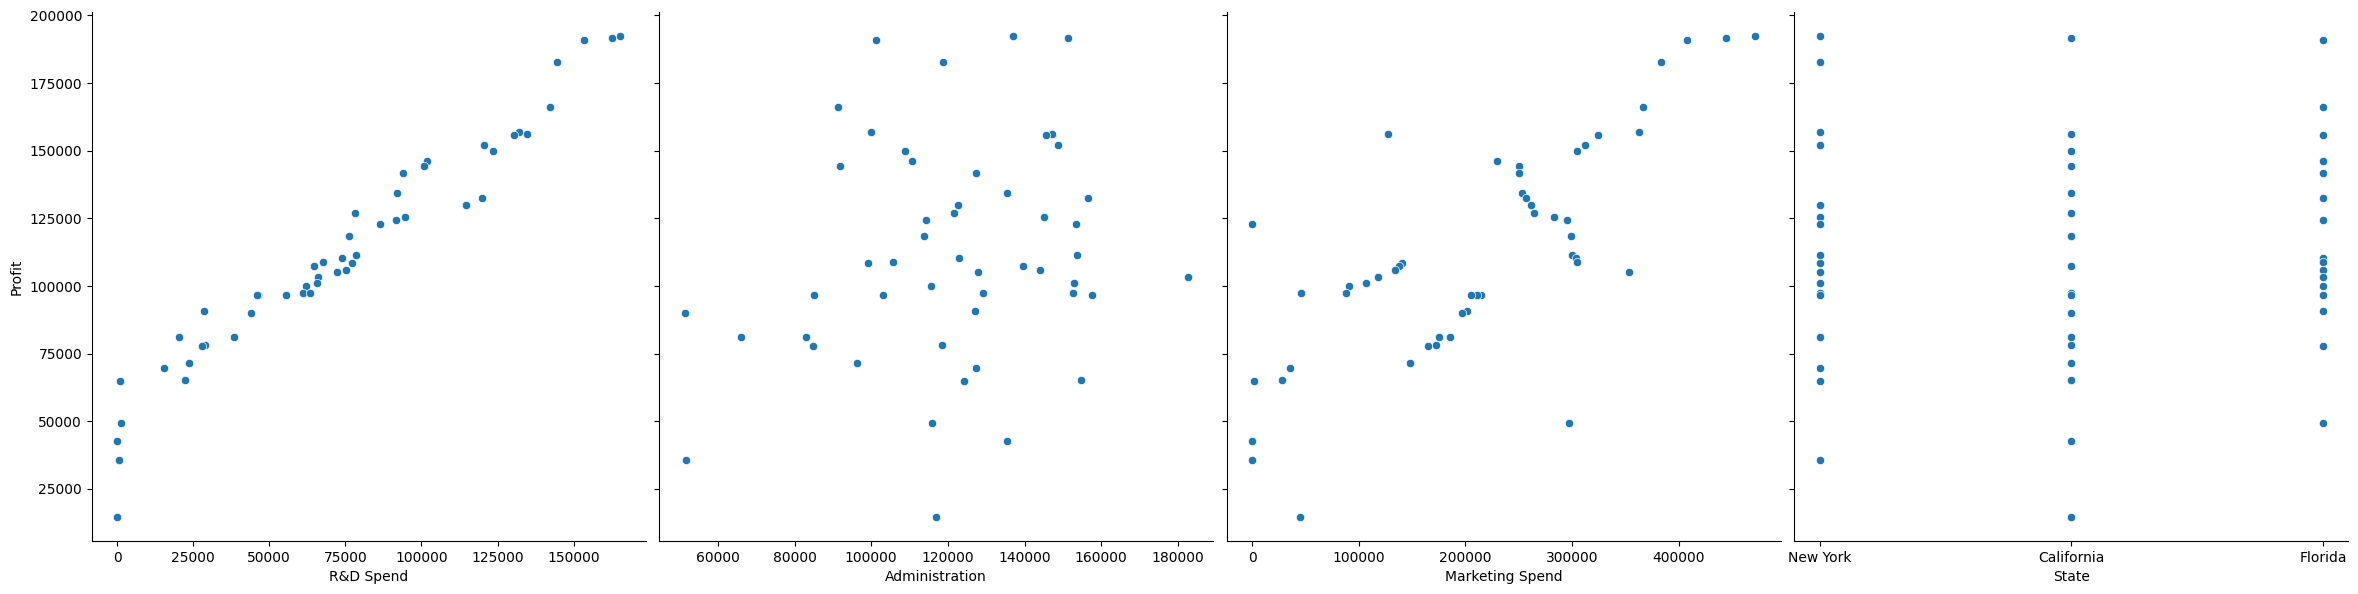

In [156]:
import seaborn as sns
#Because there are more than 1 x-variables, we check to see how 
#profits are related with each of those variables using scatter plot
sns.pairplot(data,x_vars= ['R&D Spend', 'Administration', 'Marketing Spend', 'State'],
             y_vars= ['Profit'],size=6,kind='scatter')
plt.show()

**Splitting the data into independent(X) and dependent(y) features**
- Independent features (R&D, Administration, Marketing, State) affect the dependent feature (profits)
- Dependent variable will be the profit =>regression problem

In [157]:
X = data.iloc[:, :-1]    # independent varible
#The code above select all the rows (using :) and select all the 
# columns except the last column

# We also remove 'Administration'
X = X.drop('Administration', axis = 1)

y = data.iloc[:, -1]     # dependent variable
# Select all the rows and the last column only

X.head()

,R&D Spend,Marketing Spend,State
0,165349.20,471784.10,New York
1,162597.70,443898.53,California
2,153441.51,407934.54,Florida
3,144372.41,383199.62,New York
4,142107.34,366168.42,Florida


Adminstration has the least correlation with profit so we can drop it. 

In [158]:
data['State'].unique()# Check number of unique categories

array(['New York', 'California', 'Florida'], dtype=object)

The State column in the independent variable is a categorical type with 3 unique categories

#### Convert the States into One Hot Encoding

New York => (1, 0, 0)

California => (0, 1, 0)

Florida => (0, 0, 1)
####  Dummy Variable Trap

New York => (0, 0)

California => (1, 0)

Florida => (0, 1)

In [159]:
# Since we do not need all the 3 columns and can work with only 2 columns for classifying the states, we will drop one column
states = pd.get_dummies(X['State'], drop_first=True)
states.head()

,Florida,New York
0,False,True
1,False,False
2,True,False
3,False,True
4,True,False


In [160]:
#Convert the boolean values to binary values
states = states.astype(int)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [161]:
#Drop the states column from X dataset and replace it with the one-hot encoded data
X = X.drop('State', axis = 1)
X.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [162]:
#Concatenate X with states (one-hot encoded)
X = pd.concat([X,states], axis = 1)
X.head()

,R&D Spend,Marketing Spend,Florida,New York
0,165349.20,471784.10,0,1
1,162597.70,443898.53,0,0
2,153441.51,407934.54,1,0
3,144372.41,383199.62,0,1
4,142107.34,366168.42,1,0


In [163]:
#Split the data for train and test
#Import segregating data form scikit learn
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [166]:
#Predicting the profits for the test values
y_pred = lr.predict(X_test)

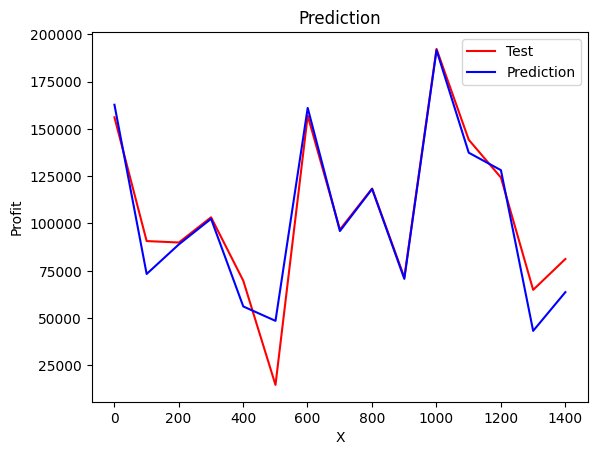

In [ ]:
c = [i for i in range (1,len(y_test)*100+1,100)]
plt.plot(c,y_test,color='r', linestyle='-', label = 'Test')
plt.plot(c,y_pred,color='b',linestyle='-', label = 'Prediction')
plt.xlabel('X')
plt.ylabel('Profit')
plt.title('Prediction')


plt.legend()
plt.show()

### Model evaluation

Compare the predicted values with the real values using the R-squared value

Formula for r-squared => 1 - (sum of residual / sum of mean)

Sum of residual = mean(sum(y_test - y_pred)^2))
Sum of mean = mean(sum(y_test - y_mean)^2))


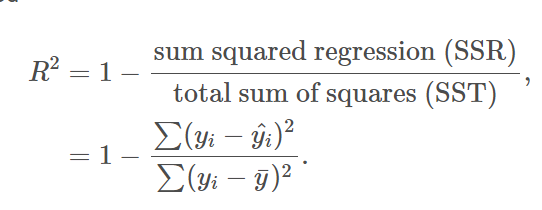



(Sum of mean > Sum of residual) always if the model is very good

r2 value => range between 0.8 to 0.98

r2 value => the more nearer to 1 => the better the model

In [168]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.9100834863988814


**0.91 => Good score**